In [1]:
import netCDF4 as nc
import pandas as pd
from netCDF4 import Dataset
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#tf.random.set_seed(7)
#tf.random.set_seed(77)

In [2]:
nc_f    = './ConThkIstAlb.APP-x.1400.250x250.Beaufort.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['time'][:]

In [3]:
sic    = nc_fid.variables['icecon'][:,0,0]

In [4]:
split = int(0.8 * len(sic))
sic_train  = sic[: split - 1]
sic_test   = sic[split:]
time_train = time[: split - 1]
time_test  = time[split:]

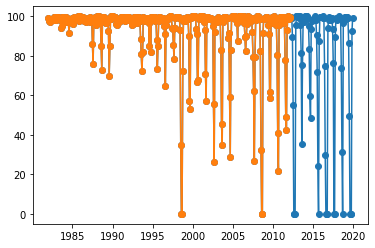

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

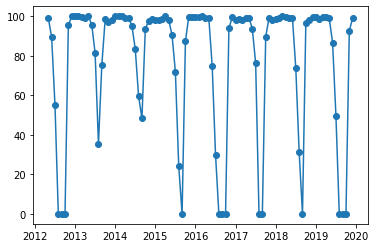

In [6]:
plt.plot(time_test,sic_test,'-o')

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [8]:
n_steps = 12
X,y = split_sequence(sic,n_steps)
print(X.shape)
print(y.shape)

(444, 12)
(444,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0:5,:])

[[0.40248787 0.33754227 0.32814822 0.33715457 0.37858185 0.39703706
  0.37057328 0.39267808 0.3636914  0.43367472 0.44474846 0.44989887]
 [0.33762562 0.32827666 0.33741343 0.37884513 0.3971094  0.36924627
  0.38910306 0.36037424 0.4316196  0.44256905 0.44911918 0.3843237 ]
 [0.32835975 0.33754227 0.3791076  0.3973743  0.36931792 0.38777333
  0.3566762  0.42959702 0.44067657 0.4470162  0.3835572  0.44115564]
 [0.33762562 0.3792382  0.39763838 0.36958033 0.38784546 0.35535124
  0.4261626  0.4388266  0.44520503 0.38030782 0.44037774 0.44552726]
 [0.3793228  0.39776975 0.36984205 0.38810953 0.35542256 0.4248275
  0.43542734 0.44344136 0.37727684 0.43812189 0.44474846 0.4542708 ]]


In [10]:
split = int(0.8 * len(X))
X_train = X[: split - 1]
X_test = X[split:]

y_train = y[: split - 1]
y_test = y[split:]

print(X_train.shape)
print(X_test.shape)

(354, 12)
(89, 12)


In [11]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [12]:
def basic_LSTM(n_steps=12, n_features=1):
    new_model = keras.Sequential()
    new_model.add(tf.keras.layers.LSTM(100, input_shape=(n_steps, n_features), activation='linear'))
    new_model.add(tf.keras.layers.Flatten())
    new_model.add(tf.keras.layers.Dense(100, activation='linear'))
    new_model.add(tf.keras.layers.Dense(100, activation='linear'))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer="adam", loss="mean_squared_error")    
    return new_model

In [13]:
lstm_model = basic_LSTM(n_steps, 1)

In [14]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 61,101
Trainable params: 61,101
Non-trainable params: 0
_________________________________________________________________


In [15]:
lstm_history = lstm_model.fit(X_train ,y_train, epochs=400, shuffle=False, batch_size=8, verbose=1)

Epoch 1/400
45/45 [==============================] - 0s 4ms/step - loss: 9883.3691
Epoch 2/400
45/45 [==============================] - 0s 4ms/step - loss: 6570.2422
Epoch 3/400
45/45 [==============================] - 0s 4ms/step - loss: 5120.2358
Epoch 4/400
45/45 [==============================] - 0s 4ms/step - loss: 2390.1316
Epoch 5/400
45/45 [==============================] - 0s 3ms/step - loss: 2248.1658
Epoch 6/400
45/45 [==============================] - 0s 3ms/step - loss: 2151.5383
Epoch 7/400
45/45 [==============================] - 0s 3ms/step - loss: 1923.2531
Epoch 8/400
45/45 [==============================] - 0s 4ms/step - loss: 1669.1349
Epoch 9/400
45/45 [==============================] - 0s 4ms/step - loss: 1399.5747
Epoch 10/400
45/45 [==============================] - 0s 4ms/step - loss: 1109.0420
Epoch 11/400
45/45 [==============================] - 0s 4ms/step - loss: 772.1810
Epoch 12/400
45/45 [==============================] - 0s 3ms/step - loss: 442.1652
Epo

45/45 [==============================] - 0s 4ms/step - loss: 100.3288
Epoch 100/400
45/45 [==============================] - 0s 3ms/step - loss: 99.3818
Epoch 101/400
45/45 [==============================] - 0s 4ms/step - loss: 98.4324
Epoch 102/400
45/45 [==============================] - 0s 4ms/step - loss: 97.4921
Epoch 103/400
45/45 [==============================] - 0s 4ms/step - loss: 96.5621
Epoch 104/400
45/45 [==============================] - 0s 4ms/step - loss: 95.6446
Epoch 105/400
45/45 [==============================] - 0s 4ms/step - loss: 94.7417
Epoch 106/400
45/45 [==============================] - 0s 4ms/step - loss: 93.8563
Epoch 107/400
45/45 [==============================] - 0s 4ms/step - loss: 92.9931
Epoch 108/400
45/45 [==============================] - 0s 4ms/step - loss: 92.1562
Epoch 109/400
45/45 [==============================] - 0s 4ms/step - loss: 91.3492
Epoch 110/400
45/45 [==============================] - 0s 4ms/step - loss: 90.5753
Epoch 111/400
45/

45/45 [==============================] - 0s 4ms/step - loss: 75.8420
Epoch 198/400
45/45 [==============================] - 0s 4ms/step - loss: 68.7952
Epoch 199/400
45/45 [==============================] - 0s 4ms/step - loss: 73.2694
Epoch 200/400
45/45 [==============================] - 0s 4ms/step - loss: 69.3225
Epoch 201/400
45/45 [==============================] - 0s 4ms/step - loss: 71.5623
Epoch 202/400
45/45 [==============================] - 0s 3ms/step - loss: 74.2929
Epoch 203/400
45/45 [==============================] - 0s 4ms/step - loss: 68.3878
Epoch 204/400
45/45 [==============================] - 0s 4ms/step - loss: 70.4600
Epoch 205/400
45/45 [==============================] - 0s 3ms/step - loss: 71.3728
Epoch 206/400
45/45 [==============================] - 0s 3ms/step - loss: 70.8586
Epoch 207/400
45/45 [==============================] - 0s 3ms/step - loss: 70.4760
Epoch 208/400
45/45 [==============================] - 0s 3ms/step - loss: 71.5127
Epoch 209/400
45/4

45/45 [==============================] - 0s 4ms/step - loss: 58.0495
Epoch 296/400
45/45 [==============================] - 0s 4ms/step - loss: 57.3017
Epoch 297/400
45/45 [==============================] - 0s 4ms/step - loss: 57.1953
Epoch 298/400
45/45 [==============================] - 0s 4ms/step - loss: 57.3004
Epoch 299/400
45/45 [==============================] - 0s 4ms/step - loss: 57.4897
Epoch 300/400
45/45 [==============================] - 0s 4ms/step - loss: 57.0666
Epoch 301/400
45/45 [==============================] - 0s 4ms/step - loss: 56.5711
Epoch 302/400
45/45 [==============================] - 0s 4ms/step - loss: 56.7090
Epoch 303/400
45/45 [==============================] - 0s 4ms/step - loss: 56.8616
Epoch 304/400
45/45 [==============================] - 0s 4ms/step - loss: 56.8024
Epoch 305/400
45/45 [==============================] - 0s 4ms/step - loss: 56.7000
Epoch 306/400
45/45 [==============================] - 0s 4ms/step - loss: 56.5347
Epoch 307/400
45/4

45/45 [==============================] - 0s 4ms/step - loss: 41.7450
Epoch 394/400
45/45 [==============================] - 0s 3ms/step - loss: 41.7824
Epoch 395/400
45/45 [==============================] - 0s 3ms/step - loss: 41.3280
Epoch 396/400
45/45 [==============================] - 0s 3ms/step - loss: 41.3263
Epoch 397/400
45/45 [==============================] - 0s 3ms/step - loss: 41.4798
Epoch 398/400
45/45 [==============================] - 0s 3ms/step - loss: 42.5537
Epoch 399/400
45/45 [==============================] - 0s 4ms/step - loss: 44.2412
Epoch 400/400
45/45 [==============================] - 0s 3ms/step - loss: 48.3863


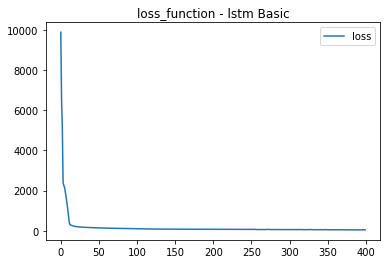

In [16]:
plt.plot(lstm_history.history["loss"])
plt.title("loss_function - lstm Basic")
plt.legend(["loss"])
plt.show()

In [17]:
#lstm_model.evaluate(X_test, y_test, verbose=0)
h = lstm_model.evaluate(X_test, y_test, verbose=0)

In [18]:
from sklearn.metrics import r2_score
predictions = lstm_model.predict(X_test)
test_r2 = r2_score(y_test, predictions)

RMSE with LSTM method =  21.597208676294766
CORR with LSTM method =  0.6401162075139215


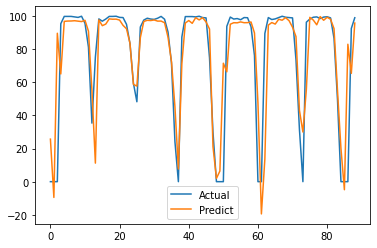

In [19]:
lstm_acc_df = pd.DataFrame()
lstm_acc_df['Actual'] = y_test
lstm_acc_df['Predict'] = predictions
lstm_acc_df.plot()
print('RMSE with LSTM method = ', h**0.5)
print('CORR with LSTM method = ', test_r2)

In [20]:
# Dumb model: SIC from previous year
prev_val = y_test[0]
sse = 0

for n in range(12, len(y_test)-1):
    err = y_test[n] - prev_val
    sq_err = err ** 2
    sse = sse + sq_err
    prev_val = y_test[n-11]

mse = sse / n
#mse

In [21]:
# Dumb model: SIC from previous year
predict = pd.DataFrame(y_test, columns = ["dumb_predict"])
predict = predict.shift(12)
predict["actual"] = y_test
predict.fillna(value=0, inplace=True)
correct_cols = ["actual", "dumb_predict"]
predict = predict.reindex(columns=correct_cols)
#predict[12:]

In [22]:
#predict[12:].plot()

In [23]:
from sklearn.metrics import r2_score
predictions = predict["dumb_predict"].values
test_r2 = r2_score(y_test[12:], predictions[12:])
#test_r2 = r2_score(y_test, predictions)
#test_r2

RMSE with SIC from Last Year =  25.071238936560555
CORR with SIC from Last Year =  0.41617065993448443


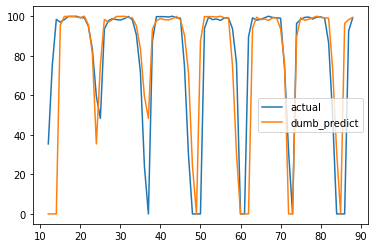

In [24]:
predict[12:].plot()
print('RMSE with SIC from Last Year = ', mse**0.5)
print('CORR with SIC from Last Year = ', test_r2)